# Data Preparation

In [26]:
# For reading in custom functions
%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
# Custom function
from src.mymods import get_datetimes, melt_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Let's start by importing in our data.

In [48]:
import pandas as pd
import numpy as np

df = pd.read_csv('../../src/data/zillow_data.csv')
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [28]:
df = melt_data(df)
df.head()

,RegionName,City,State,Metro,CountyName,RegionID,SizeRank,time,value
0,60657,Chicago,IL,Chicago,Cook,84654,1,1996-04-01,334200.0
1,75070,McKinney,TX,Dallas-Fort Worth,Collin,90668,2,1996-04-01,235700.0
2,77494,Katy,TX,Houston,Harris,91982,3,1996-04-01,210400.0
3,60614,Chicago,IL,Chicago,Cook,84616,4,1996-04-01,498100.0
4,79936,El Paso,TX,El Paso,El Paso,93144,5,1996-04-01,77300.0


In [29]:
# making our time column the index
df.set_index('time', drop=True, inplace=True)
df.head()

,RegionName,City,State,Metro,CountyName,RegionID,SizeRank,value
time,,,,,,,,
1996-04-01,60657,Chicago,IL,Chicago,Cook,84654,1,334200.0
1996-04-01,75070,McKinney,TX,Dallas-Fort Worth,Collin,90668,2,235700.0
1996-04-01,77494,Katy,TX,Houston,Harris,91982,3,210400.0
1996-04-01,60614,Chicago,IL,Chicago,Cook,84616,4,498100.0
1996-04-01,79936,El Paso,TX,El Paso,El Paso,93144,5,77300.0


We decided to use the timeframe of 2012 to 2018 to remove all data prior to the ending of the housing market crash.

In [30]:
df['Financial_Crash'] = df.index
df['Financial_Crash'] = df.Financial_Crash.apply(lambda x: x.year)
df['Financial_Crash'] = df.Financial_Crash.apply(lambda x: x >= 2012)
df.head()

,RegionName,City,State,Metro,CountyName,RegionID,SizeRank,value,Financial_Crash
time,,,,,,,,,
1996-04-01,60657,Chicago,IL,Chicago,Cook,84654,1,334200.0,False
1996-04-01,75070,McKinney,TX,Dallas-Fort Worth,Collin,90668,2,235700.0,False
1996-04-01,77494,Katy,TX,Houston,Harris,91982,3,210400.0,False
1996-04-01,60614,Chicago,IL,Chicago,Cook,84616,4,498100.0,False
1996-04-01,79936,El Paso,TX,El Paso,El Paso,93144,5,77300.0,False


In [32]:
df_filtered = df[df['Financial_Crash'] == True]
df_filtered.head()

,RegionName,City,State,Metro,CountyName,RegionID,SizeRank,value,Financial_Crash
time,,,,,,,,,
2012-01-01,60657,Chicago,IL,Chicago,Cook,84654,1,737700.0,True
2012-01-01,75070,McKinney,TX,Dallas-Fort Worth,Collin,90668,2,199600.0,True
2012-01-01,77494,Katy,TX,Houston,Harris,91982,3,248600.0,True
2012-01-01,60614,Chicago,IL,Chicago,Cook,84616,4,928900.0,True
2012-01-01,79936,El Paso,TX,El Paso,El Paso,93144,5,112400.0,True


# Modeling Prep

We will perform the model making process in its entirety on one zip code. Then, we will provide the outputs of the other four zip codes using the exact same process.

In [33]:
import matplotlib.pyplot as plt

df_37115 = df_filtered[df_filtered['RegionName'] == 37115]

In [34]:
df_37115 = df_37115.value

In [35]:
df_37115

time
2012-01-01     94800.0
2012-02-01     95100.0
2012-03-01     96000.0
2012-04-01     96400.0
2012-05-01     96500.0
                ...   
2017-12-01    181700.0
2018-01-01    183900.0
2018-02-01    186000.0
2018-03-01    188300.0
2018-04-01    189800.0
Name: value, Length: 76, dtype: float64

# Modeling for 37115

In [36]:
# we will be using 80% of our data as the training set

eot_index_37115 = round(df_37115.shape[0]*0.8)
eot_index_37115

61

In [37]:
# split data into train and test sets

train_37115 = df_37115[:eot_index_37115]
test_37115 = df_37115[eot_index_37115:]

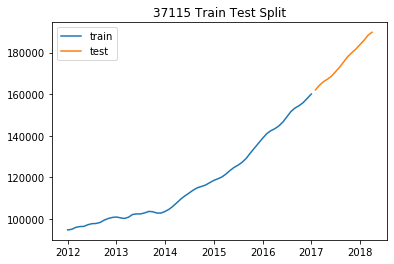

In [38]:
plt.plot(train_37115, label='train')
plt.plot(test_37115, label='test')
plt.title('37115 Train Test Split')
plt.legend(loc='best')
plt.show()

Now that we have our data split, we can use them in modeling.

### ARIMA Model

In [39]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error

p,d,q = autoregressors, differences, moving average

pacf = help us decide the AR term

acf = help us decide the MA term

We can figure out the order of differencing using the Dickey-Fuller Test

In [40]:
# function that will help us find the Dickey-Fuller Test 
def test_stationarity(timeseries):
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [41]:
test_stationarity(train_37115.diff().dropna())

Results of Dickey-Fuller Test:
Test Statistic                 -0.744126
p-value                         0.834987
#Lags Used                      9.000000
Number of Observations Used    50.000000
Critical Value (1%)            -3.568486
Critical Value (5%)            -2.921360
Critical Value (10%)           -2.598662
dtype: float64


In [42]:
test_stationarity(train_37115.diff().diff().dropna())

Results of Dickey-Fuller Test:
Test Statistic                 -5.495884
p-value                         0.000002
#Lags Used                      4.000000
Number of Observations Used    54.000000
Critical Value (1%)            -3.557709
Critical Value (5%)            -2.916770
Critical Value (10%)           -2.596222
dtype: float64


We are checking to see whether our test statistic is smaller than our critical value at 5%. Based on the Dickey-Fuller Test above, our order of difference should be 2.

We can manually find our p and q values using autocorrelation and partial autocorrelation, respectively, which can them be used as optimal parameters for our ARIMA test.

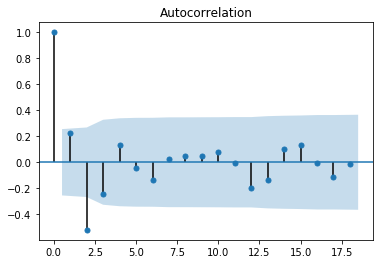

In [43]:
plot_acf(train_37115.diff().diff().dropna()); # q, or MA term

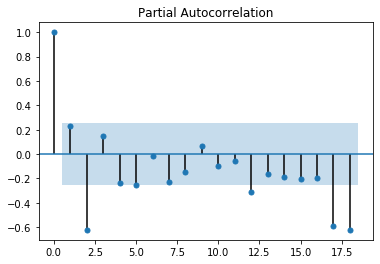

In [44]:
plot_pacf(train_37115.diff().diff().dropna()); # p, or AR term

In [45]:
# checking optimal parameters using auto_arima

from pmdarima import auto_arima

auto_arima(train_37115, start_p=0, start_q=0, max_p=6, max_q=3, seasonal=False, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=896.875, Time=0.10 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=898.397, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=898.266, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=895.125, Time=0.01 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=901.421, Time=0.11 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.827 seconds


ARIMA(order=(0, 2, 0), scoring_args={}, with_intercept=False)

In [46]:
model_37115 = ARIMA(train_37115, (0, 2, 1), freq='MS').fit()
model_37115.predict(typ='levels').head()

2012-03-01    95436.151115
2012-04-01    97195.248210
2012-05-01    96372.906503
2012-06-01    96715.899000
2012-07-01    98513.298821
Freq: MS, dtype: float64

In [51]:
# lets check our RMSE on training and test data

y_hat_37115 = model_37115.predict(typ='levels')
y_hat_test_37115 = model_37115.predict(start=test_37115.index[0], end=test_37115.index[-1],typ='levels')

print(f'Training RMSE for ARIMA : {np.sqrt(mean_squared_error(train_37115[2:], y_hat_37115))}')
print(f'Test RMSE for ARIMA : {np.sqrt(mean_squared_error(test_37115, y_hat_test_37115))}')

Training RMSE for ARIMA : 407.25122653780335
Test RMSE for ARIMA : 2944.1678114071765


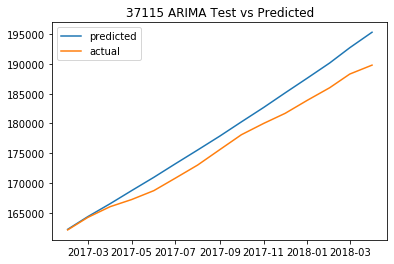

In [52]:
plt.plot(y_hat_test_37115, label='predicted')
plt.plot(test_37115, label='actual')
plt.title('37115 ARIMA Test vs Predicted')
plt.legend(loc='best')
plt.show()

### SARIMAX Model

In [53]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools

In [54]:
p = q = range(0, 3)
pdq = list(itertools.product(p, [2], q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, [1], q))]
print('Examples of parameter for SARIMA...')
for i in pdq:
    for s in seasonal_pdq:
        print('SARIMAX: {} x {}'.format(i, s))

        #12 indicates 1 year

Examples of parameter for SARIMA...
SARIMAX: (0, 2, 0) x (0, 1, 0, 12)
SARIMAX: (0, 2, 0) x (0, 1, 1, 12)
SARIMAX: (0, 2, 0) x (0, 1, 2, 12)
SARIMAX: (0, 2, 0) x (1, 1, 0, 12)
SARIMAX: (0, 2, 0) x (1, 1, 1, 12)
SARIMAX: (0, 2, 0) x (1, 1, 2, 12)
SARIMAX: (0, 2, 0) x (2, 1, 0, 12)
SARIMAX: (0, 2, 0) x (2, 1, 1, 12)
SARIMAX: (0, 2, 0) x (2, 1, 2, 12)
SARIMAX: (0, 2, 1) x (0, 1, 0, 12)
SARIMAX: (0, 2, 1) x (0, 1, 1, 12)
SARIMAX: (0, 2, 1) x (0, 1, 2, 12)
SARIMAX: (0, 2, 1) x (1, 1, 0, 12)
SARIMAX: (0, 2, 1) x (1, 1, 1, 12)
SARIMAX: (0, 2, 1) x (1, 1, 2, 12)
SARIMAX: (0, 2, 1) x (2, 1, 0, 12)
SARIMAX: (0, 2, 1) x (2, 1, 1, 12)
SARIMAX: (0, 2, 1) x (2, 1, 2, 12)
SARIMAX: (0, 2, 2) x (0, 1, 0, 12)
SARIMAX: (0, 2, 2) x (0, 1, 1, 12)
SARIMAX: (0, 2, 2) x (0, 1, 2, 12)
SARIMAX: (0, 2, 2) x (1, 1, 0, 12)
SARIMAX: (0, 2, 2) x (1, 1, 1, 12)
SARIMAX: (0, 2, 2) x (1, 1, 2, 12)
SARIMAX: (0, 2, 2) x (2, 1, 0, 12)
SARIMAX: (0, 2, 2) x (2, 1, 1, 12)
SARIMAX: (0, 2, 2) x (2, 1, 2, 12)
SARIMAX: (1, 2, 0) 

In [55]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod =SARIMAX(train_37115,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False, freq='MS')
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            print('hello')
            continue

/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 0)x(0, 1, 0, 12) - AIC:739.507127257072


/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


ARIMA(0, 2, 0)x(0, 1, 1, 12) - AIC:1450.8557754573883
ARIMA(0, 2, 0)x(0, 1, 2, 12) - AIC:348.5377340585172
ARIMA(0, 2, 0)x(1, 1, 0, 12) - AIC:538.1015920183934


/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 0)x(1, 1, 1, 12) - AIC:1696.595558544151
ARIMA(0, 2, 0)x(1, 1, 2, 12) - AIC:347.1913111955339
ARIMA(0, 2, 0)x(2, 1, 0, 12) - AIC:359.7170851118716


/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 0)x(2, 1, 1, 12) - AIC:1074.1795474903008


/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 0)x(2, 1, 2, 12) - AIC:349.04431705054054
ARIMA(0, 2, 1)x(0, 1, 0, 12) - AIC:707.0846958853406


/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 1)x(0, 1, 1, 12) - AIC:713.5590659886221
ARIMA(0, 2, 1)x(0, 1, 2, 12) - AIC:324.3009087020765


/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 1)x(1, 1, 0, 12) - AIC:539.795861701349


/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 1)x(1, 1, 1, 12) - AIC:1155.5147095483635
ARIMA(0, 2, 1)x(1, 1, 2, 12) - AIC:325.0696896635199


/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 1)x(2, 1, 0, 12) - AIC:361.7105022953457


/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 1)x(2, 1, 1, 12) - AIC:1073.340651780909


/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 1)x(2, 1, 2, 12) - AIC:325.22257247877627
ARIMA(0, 2, 2)x(0, 1, 0, 12) - AIC:680.3676101428672


/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 2)x(0, 1, 1, 12) - AIC:1065.5087443980824


/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 2)x(0, 1, 2, 12) - AIC:301.24129235395293


/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 2)x(1, 1, 0, 12) - AIC:539.4428573910909


/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 2)x(1, 1, 1, 12) - AIC:1470.6416812281982


/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 2)x(1, 1, 2, 12) - AIC:307.3342035391936
ARIMA(0, 2, 2)x(2, 1, 0, 12) - AIC:358.4828854593414


/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/optimize/_numdiff.py:390: RuntimeWarning: invalid value encountered in less
  if np.any((x0 < lb) | (x0 > ub)):
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/optimize/_numdiff.py:390: RuntimeWarning: invalid value encountered in greater
  if np.any((x0 < lb) | (x0 > ub)):
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/optimize/_numdiff.py:405: RuntimeWarning: invalid value encountered in greater_equal
  sign_x0 = (x0 >= 0).astype(float) * 2 - 1
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge

ARIMA(0, 2, 2)x(2, 1, 1, 12) - AIC:nan


/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 2, 2)x(2, 1, 2, 12) - AIC:311.7446374217353
ARIMA(1, 2, 0)x(0, 1, 0, 12) - AIC:738.8577429258803


/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 2, 0)x(0, 1, 1, 12) - AIC:1117.7001600372166
ARIMA(1, 2, 0)x(0, 1, 2, 12) - AIC:346.0959172569902
ARIMA(1, 2, 0)x(1, 1, 0, 12) - AIC:520.1690870527075


/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 2, 0)x(1, 1, 1, 12) - AIC:1474.3908342618074
ARIMA(1, 2, 0)x(1, 1, 2, 12) - AIC:345.079369349778


/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 2, 0)x(2, 1, 0, 12) - AIC:342.94756885937824


/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 2, 0)x(2, 1, 1, 12) - AIC:983.7262164045437


/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 2, 0)x(2, 1, 2, 12) - AIC:347.12033338721403
ARIMA(1, 2, 1)x(0, 1, 0, 12) - AIC:709.1538483819006


/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 2, 1)x(0, 1, 1, 12) - AIC:1429.0165362232742
ARIMA(1, 2, 1)x(0, 1, 2, 12) - AIC:326.2768482623748


/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 2, 1)x(1, 1, 0, 12) - AIC:521.5248330415023


/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 2, 1)x(1, 1, 1, 12) - AIC:961.8433989473941
ARIMA(1, 2, 1)x(1, 1, 2, 12) - AIC:326.26039489646143


/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 2, 1)x(2, 1, 0, 12) - AIC:342.9423263990607


/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 2, 1)x(2, 1, 1, 12) - AIC:699.6832777005841


/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 2, 1)x(2, 1, 2, 12) - AIC:330.9273269046116
ARIMA(1, 2, 2)x(0, 1, 0, 12) - AIC:683.0841471651656


/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 2, 2)x(0, 1, 1, 12) - AIC:1533.252172033745
ARIMA(1, 2, 2)x(0, 1, 2, 12) - AIC:310.7520693617115


/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 2, 2)x(1, 1, 0, 12) - AIC:521.2969458982799


/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 2, 2)x(1, 1, 1, 12) - AIC:1529.8885577962417
ARIMA(1, 2, 2)x(1, 1, 2, 12) - AIC:312.3099409103668


/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 2, 2)x(2, 1, 0, 12) - AIC:341.4455377163409


/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 2, 2)x(2, 1, 1, 12) - AIC:990.0627858302736
ARIMA(1, 2, 2)x(2, 1, 2, 12) - AIC:312.63228458050617
ARIMA(2, 2, 0)x(0, 1, 0, 12) - AIC:696.8318080430066


/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 2, 0)x(0, 1, 1, 12) - AIC:952.081421929845
ARIMA(2, 2, 0)x(0, 1, 2, 12) - AIC:333.9753643836474


/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 2, 0)x(1, 1, 0, 12) - AIC:490.3505211382657


/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 2, 0)x(1, 1, 1, 12) - AIC:1427.4261548901527
ARIMA(2, 2, 0)x(1, 1, 2, 12) - AIC:334.9071467156597


/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 2, 0)x(2, 1, 0, 12) - AIC:313.45293446943504


/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 2, 0)x(2, 1, 1, 12) - AIC:708.8715815270656
ARIMA(2, 2, 0)x(2, 1, 2, 12) - AIC:317.357047916864
ARIMA(2, 2, 1)x(0, 1, 0, 12) - AIC:698.5269874197907


/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 2, 1)x(0, 1, 1, 12) - AIC:1363.433739343036
ARIMA(2, 2, 1)x(0, 1, 2, 12) - AIC:319.74233591131986


/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 2, 1)x(1, 1, 0, 12) - AIC:492.0538788068318


/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 2, 1)x(1, 1, 1, 12) - AIC:1675.5473687396561
ARIMA(2, 2, 1)x(1, 1, 2, 12) - AIC:320.56006111643114


/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 2, 1)x(2, 1, 0, 12) - AIC:315.1759635983121


/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 2, 1)x(2, 1, 1, 12) - AIC:779.6999257739454


/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 2, 1)x(2, 1, 2, 12) - AIC:322.5482294161787
ARIMA(2, 2, 2)x(0, 1, 0, 12) - AIC:674.5812861038695


/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 2, 2)x(0, 1, 1, 12) - AIC:1581.3500476088302


/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 2, 2)x(0, 1, 2, 12) - AIC:300.9811625395024
ARIMA(2, 2, 2)x(1, 1, 0, 12) - AIC:493.0033524949693


/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 2, 2)x(1, 1, 1, 12) - AIC:1565.208820627408


/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 2, 2)x(1, 1, 2, 12) - AIC:305.25306882374036
ARIMA(2, 2, 2)x(2, 1, 0, 12) - AIC:317.1713022854646


/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 2, 2)x(2, 1, 1, 12) - AIC:636.3331178449629
ARIMA(2, 2, 2)x(2, 1, 2, 12) - AIC:304.8993878396157


/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Once we have found our best producing AIC model, we can use those parameters to optimize our SARIMAX model.

In [56]:
sari_mod_37115 =SARIMAX(train_37115,order=(2,2,2),
                  seasonal_order=(0,1,2,12),
                  enforce_stationarity=False,
                  enforce_invertibility=False,
                  freq='MS').fit()

/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


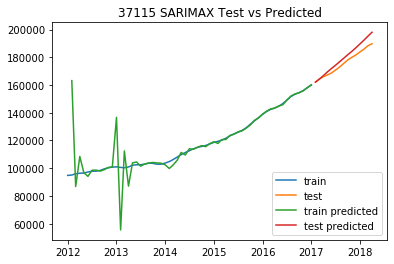

In [57]:
y_hat_train_37115 = sari_mod_37115.predict(typ='levels')
y_hat_train_37115 = y_hat_train_37115.iloc[1:]
y_hat_test_37115 = sari_mod_37115.predict(start=test_37115.index[0], end=test_37115.index[-1],typ='levels')

fig, ax = plt.subplots()
ax.plot(train_37115, label='train')
ax.plot(test_37115, label='test')
ax.plot(y_hat_train_37115, label='train predicted')
ax.plot(y_hat_test_37115, label='test predicted')
ax.legend(loc='best')
ax.set_title('37115 SARIMAX Test vs Predicted')
plt.show()

In [58]:
print(f'SARIMAX Train RMSE : {np.sqrt(mean_squared_error(train_37115[1:], y_hat_train_37115))}')
print(f'SARIMAX Test RMSE : {np.sqrt(mean_squared_error(test_37115, y_hat_test_37115))}')

SARIMAX Train RMSE : 11966.900722137349
SARIMAX Test RMSE : 4523.182037135526


### Forecasting

In [59]:
sari_mod_37115 =SARIMAX(df_37115,order=(1,1,1),
                  seasonal_order=(0,1,1,12),
                  enforce_stationarity=False,
                  enforce_invertibility=False,
                  freq='MS').fit()

/Users/jonhickey/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [60]:
forecast_37115 = sari_mod_37115.get_forecast(steps=60)
forecast_37115.summary_frame().head()

value,mean,mean_se,mean_ci_lower,mean_ci_upper
2018-05-01,190619.835853,398.225481,189839.328252,191400.343453
2018-06-01,191910.633802,973.739548,190002.139358,193819.128246
2018-07-01,193807.502794,1546.078794,190777.244040,196837.761548
2018-08-01,195885.781096,2085.646454,191797.989161,199973.573031
2018-09-01,198112.435747,2584.622329,193046.669069,203178.202425


Populating the interactive namespace from numpy and matplotlib


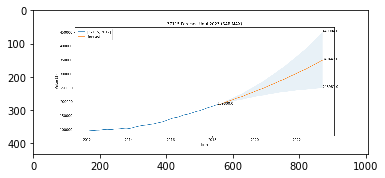

In [73]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('figures/37115_forecast_sarimax.png')
img.resize()
imgplot = plt.imshow(img)
plt.show()